# Financial Returns

#### Overview:

Learn how to analyze investment return distributions, build portfolios and reduce risk, identify key factors which are driving portfolio returns

* Univariate Investment Risk
* Portfolio Investing
* Factor Investing
* Forecasting and Reducing Risk

#### How do you typically measure risk?

* Standard deviation or variance of daily returns
* Kurtosis of the daily returns distribution
* Skewness of the daily returns distribution
* Historical drawdowns

* Discrete returns (simple returns) are most commonly used, and represent <b> periodic (e.g daily, weekly, monthly) price movements</b>

* Log returns: often used in academic research and financial modelings. They assume continuous compounding



* Discrete returns are calculated as the change in price as a percentage of the previous period's price

### Calculating log returns: 
* calculated as the difference between the log of two prices
* Log returns aggregate across time, while discrete returns aggregate across assets



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

btc = pd.read_csv('BTC-USD.csv', parse_dates=['Date'])
btc = btc.sort_values(by='Date')
btc.set_index('Date', inplace=True)

btc.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-02,4200.733398,4301.519531,4110.978516,4139.877930,4139.877930,5262697895
2018-12-03,4147.323730,4155.979492,3840.446289,3894.130859,3894.130859,5089570993
2018-12-04,3886.294922,4075.627686,3832.750000,3956.893799,3956.893799,5028069239
2018-12-05,3958.894775,3969.535889,3753.994873,3753.994873,3753.994873,5302481573
2018-12-06,3754.074463,3874.966064,3521.101807,3521.101807,3521.101807,5878333109


In [2]:
btc['Returns'] = btc['Adj Close'].pct_change()
btc['Returns'].head()

Date
2018-12-02         NaN
2018-12-03   -0.059361
2018-12-04    0.016117
2018-12-05   -0.051277
2018-12-06   -0.062039
Name: Returns, dtype: float64

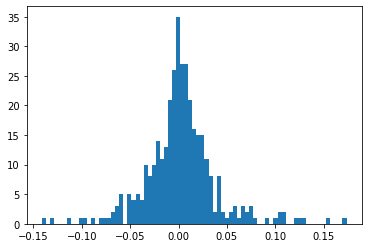

In [3]:
import matplotlib.pyplot as plt
plt.hist(btc['Returns'].dropna(), bins=75, density=False)
plt.show();

## Moments of Distributions

Probability distributions have the following moments
* Mean
* Variance
* Skewness
* Kurtosis

## The Normal Distribution
A random variable with a Gaussian distribution is said to be normally distributed

#### Normal Distributions have the following properties:

* Mean
* Variance squared
* Skewness = 0
* Kurtosis = 3

The standard normal is a special case of the Normal Distribution when
* Variance = 1
* Mean = 0

#### Comparing Against a Normal Distribution

* Normal distributions have a skewness near 0 and a kurtosis near 3
* Financial returns tend not to be normally distributed
* Financial returns can have high kurtosis

In [4]:
# Calculating mean returns
import numpy as np
np.mean(btc['Returns'])

0.0022509891071344286

In [5]:
# Calculate the average annualized return assuming 365 trading days in a year
((1 + np.mean(btc['Returns']))**365)-1

1.2720617762056912

#### Standard deviation and Variance

Standard deviation(volatility) : measures the dispersion of returns

In [6]:
# Standard deviation
np.std(btc['Returns'])

0.03716129149794761

In [7]:
# To calculate the variance, square the standard deviation
np.std(btc['Returns'])**2

0.0013809615857954334

## Scaling volatility

* Volatility scales with the square root of time
* Crypto is 365 days a year, 24/7

In [8]:
# Scaling volatility 
np.std(btc['Returns']) * np.sqrt(365)

0.7099654771996545

## Skewness

Skewness is the third moment of a distribution

* Negative Skew: The mass of the distribution is concentrated on the right, Usually a right leaning curve

* Positive Skew: The mass of the distribution is concentrated on the left, Usually a left leaning curve

In finance you tend to want a positive skewness

In [9]:
from scipy.stats import skew
skew(btc['Returns'].dropna())

0.497179168010133

In [10]:
from scipy.stats import skew

clean_returns = (btc['Returns'].dropna())

returns_skewness = skew(clean_returns)
print(returns_skewness)

0.497179168010133


## Kurtosis
Kurtosis is a measure of the thickness of the tails of a distribution

* Most financial returns are leptokurtic

* Leptokurtic: When a distribution has positive excess kurtosis ( kurtosis greater than 3)

* Excess kurtosis: Subtract 3 from the sample kurtosis to calculate ('Excess Kurtosis')

In [11]:
# Excess kurtosis
from scipy.stats import kurtosis
kurtosis(btc['Returns'].dropna())

3.7195195481500978

In [12]:
excess_kurtosis = kurtosis(clean_returns)
print(excess_kurtosis)

fourth_moment = excess_kurtosis + 3
print(fourth_moment)

3.7195195481500978
6.719519548150098


## Testing for Normality

The null hypothesis of the Shapiro-Wilk test is that the data are normally distributed

The shapiro() function will return two values in a list
* First value is the t-stat of the test
* Second value is the p-value
You can use the p-value to make a judgement about the normality of the data
* If the p-value is less than or equal to 0.05, you can safely reject the null hypothesis of normality and assume that the data are non-normally distributed

In [13]:
from scipy.stats import shapiro

# Shapiro-Wilk test
shapiro_results = shapiro(clean_returns)
print('Shapiro results:', shapiro_results)

# Extract p-values 
p_value = shapiro_results[1]
print('P-values: ', p_value)

Shapiro results: (0.9264898300170898, 2.178142432043839e-12)
P-values:  2.178142432043839e-12


In [14]:
from scipy import stats
p_value = stats.shapiro(btc['Returns'].dropna())[1]
if p_value <= 0.05:
    print('Null hypothesis of normality is rejected')
else: 
    print('Null hypothesis of normality is accepted')

Null hypothesis of normality is rejected
